In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
from knn import KNN, LOO
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv('KNNAlgorithmDataset.csv')
data['diagnosis'] = data['diagnosis'].replace({'B': 0, 'M':1})
X_train, X_test, y_train, y_test= train_test_split(data[data.columns[2:-1]], data['diagnosis'], test_size=0.2, random_state=42)

In [16]:
k, metrics = LOO(data[data.columns[2:-1]],data['diagnosis'], range(1,10))

Text(0.5, 1.0, 'Эмпирический риск для различных k')

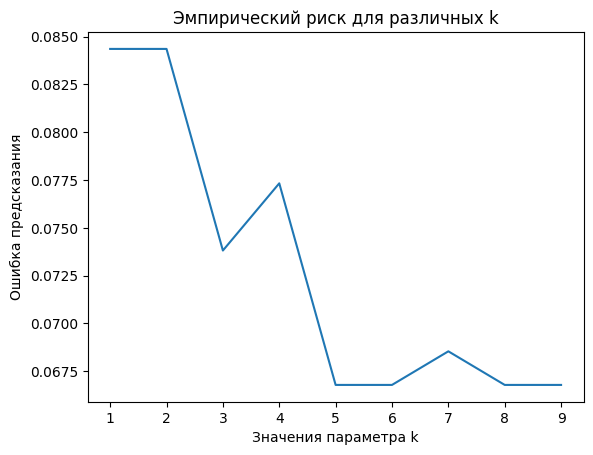

In [17]:
plt.plot( range(1,10), metrics)
plt.xlabel('Значения параметра k')
plt.ylabel('Ошибка предсказания')
plt.title('Эмпирический риск для различных k')

____________________________________________
# Сравнение с эталоном

In [19]:
import time

In [21]:
s = KNN(k, X_train,y_train)
start = time.time()
labels = s.predict(X_test)
print("Время:",time.time() - start)
print("Accuracy:", accuracy_score(y_test, labels))
print("Classification Report:\n", classification_report(y_test, labels))

Время: 0.004075527191162109
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [22]:
model = KNeighborsClassifier(5, p = 2)
model.fit(X_train, y_train)
labels_main = model.predict(X_test)
print("Время:",time.time() - start)
print("Accuracy:", accuracy_score(y_test, labels_main))
print("Classification Report:\n", classification_report(y_test, labels_main))

Время: 12.189560651779175
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

